<a href="https://colab.research.google.com/github/NeSma237/AI-platforms-assignment_4-/blob/main/Keras_VS_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from keras.datasets import fashion_mnist

In [2]:
(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print('the shape of training inputs: ' , X_train.shape)
print('the shape of training labels: ' , y_train.shape)
print('the shape of testing inputs: ' , X_test.shape)
print('the shape of testing labels: ' , y_test.shape)

the shape of training inputs:  (60000, 28, 28)
the shape of training labels:  (60000,)
the shape of testing inputs:  (10000, 28, 28)
the shape of testing labels:  (10000,)


In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

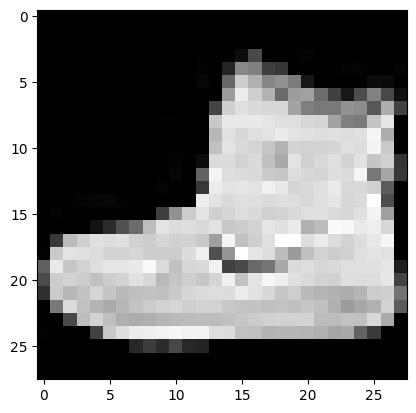

In [5]:
plt.imshow(X_train[0] , cmap = 'gray')
plt.show()

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28,28,1)),
    layers.Conv2D(6, (5,5), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,836 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,050 (250.20 KB)

 Trainable params: 64,050 (250.20 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [20]:
# training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.weights.h5', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
history = model.fit(X_train , y_train , epochs=13 , batch_size=128 , validation_data=(X_test , y_test),callbacks=[early_stopping, model_checkpoint, reduce_lr])
model.save_weights('weights_adam.weights.h5')

Epoch 1/13
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6716 - loss: 0.9396

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6718 - loss: 0.9390 - val_accuracy: 0.8235 - val_loss: 0.4894 - learning_rate: 0.0010
Epoch 2/13
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.4469

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8369 - loss: 0.4467 - val_accuracy: 0.8612 - val_loss: 0.3987 - learning_rate: 0.0010
Epoch 3/13
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8643 - loss: 0.3773

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8644 - loss: 0.3771 - val_accuracy: 0.8711 - val_loss: 0.3575 - learning_rate: 0.0010
Epoch 4/13
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.3355

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8795 - loss: 0.3354 - val_accuracy: 0.8727 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 5/13
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8869 - loss: 0.3094

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8869 - loss: 0.3094 - val_accuracy: 0.8800 - val_loss: 0.3337 - learning_rate: 0.0010
Epoch 6/13
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.2919

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8941 - loss: 0.2919 - val_accuracy: 0.8859 - val_loss: 0.3132 - learning_rate: 0.0010
Epoch 7/13
453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9010 - loss: 0.2699

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9010 - loss: 0.2700 - val_accuracy: 0.8875 - val_loss: 0.3114 - learning_rate: 0.0010
Epoch 8/13
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9049 - loss: 0.2620 - val_accuracy: 0.8847 - val_loss: 0.3169 - learning_rate: 0.0010
Epoch 9/13
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9085 - loss: 0.2512

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9085 - loss: 0.2511 - val_accuracy: 0.8944 - val_loss: 0.2949 - learning_rate: 0.0010
Epoch 10/13
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - loss: 0.2364

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9127 - loss: 0.2364 - val_accuracy: 0.8958 - val_loss: 0.2834 - learning_rate: 0.0010
Epoch 11/13
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9173 - loss: 0.2276 - val_accuracy: 0.8954 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 12/13
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9204 - loss: 0.2165 - val_accuracy: 0.8948 - val_loss: 0.2835 - learning_rate: 0.0010
Epoch 13/13
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9235 - loss: 0.2046 - val_accuracy: 0.8968 - val_loss: 0.2892 - learning_rate: 0.0010


In [21]:
loss , accuracy = model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.2814


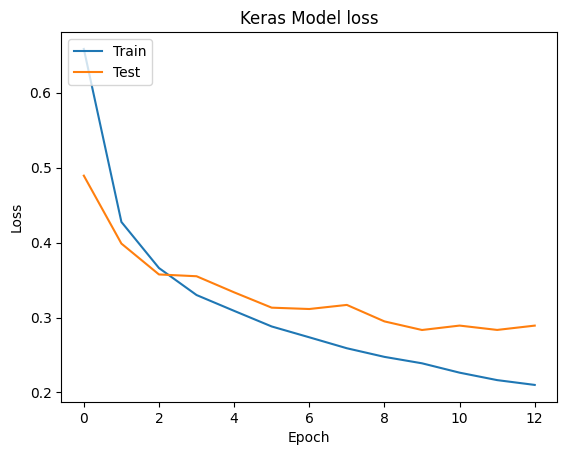

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Keras Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Pytorch

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
import torch.utils.data as data

# Convert NumPy arrays to PyTorch tensors
X_train_pt = torch.tensor(X_train).unsqueeze(1).float() # Add channel dimension and convert to float
y_train_pt = torch.tensor(y_train).long()
X_test_pt = torch.tensor(X_test).unsqueeze(1).float()
y_test_pt = torch.tensor(y_test).long()

# Create TensorDatasets
train_dataset = data.TensorDataset(X_train_pt, y_train_pt)
test_dataset = data.TensorDataset(X_test_pt, y_test_pt)

# Create DataLoaders
batch_size = 128
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Check device availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda:0


In [23]:
net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 13

# Initialize lists to store metrics for plotting
pytorch_train_losses = []
pytorch_test_losses = []

for epoch in range(num_epochs):
    net.train() # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs);
        loss = criterion(outputs, labels);
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Store training loss for the epoch
    pytorch_train_losses.append(running_loss / len(train_loader))

    # Evaluate on test set after each epoch to get test loss and accuracy
    net.eval() # Set the model to evaluation mode
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss_test = criterion(outputs, labels) # Calculate test loss
            test_loss += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Store test loss for the epoch
    pytorch_test_losses.append(test_loss / len(test_loader))

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}, Accuracy on test set: {100 * correct / total:.2f}%')

print('Finished Training')


Epoch 1, Loss: 0.835, Accuracy on test set: 75.19%
Epoch 2, Loss: 0.548, Accuracy on test set: 81.25%
Epoch 3, Loss: 0.463, Accuracy on test set: 83.72%
Epoch 4, Loss: 0.410, Accuracy on test set: 84.87%
Epoch 5, Loss: 0.377, Accuracy on test set: 85.75%
Epoch 6, Loss: 0.350, Accuracy on test set: 86.08%
Epoch 7, Loss: 0.335, Accuracy on test set: 86.96%
Epoch 8, Loss: 0.320, Accuracy on test set: 87.36%
Epoch 9, Loss: 0.308, Accuracy on test set: 87.31%
Epoch 10, Loss: 0.296, Accuracy on test set: 87.95%
Epoch 11, Loss: 0.288, Accuracy on test set: 87.67%
Epoch 12, Loss: 0.278, Accuracy on test set: 88.22%
Epoch 13, Loss: 0.270, Accuracy on test set: 88.13%
Finished Training


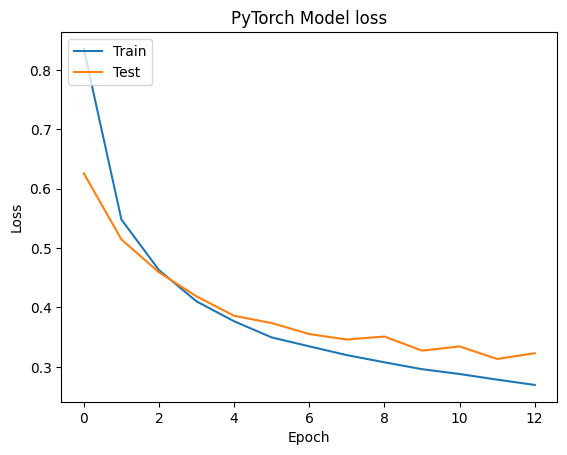

In [24]:
plt.plot(pytorch_train_losses)
plt.plot(pytorch_test_losses)
plt.title('PyTorch Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()